In this notebook, we will explore how we can use Frequency distributions and Conditional Frequency distributions to do analysis and generation. We will kick off with some small analysis, construct distributions, do bigrams and then use the CFD for text generation. 

In [68]:
#------Hitarth-------------------
import numpy as np
import pandas as pd
import nltk
import mysql.connector
import glob
import pickle
from nltk.collocations import *
import random
from nltk.corpus import wordnet as wn

In [42]:
# Each element of the dictionary is a list of words spoken during a particular episode of the podcast
with open('podcast_dict.pkl','rb') as f:
    data = pickle.load(f)

In [43]:
# Combining all the podcasts
total_corpus = []
for i in data.keys():
    total_corpus += data[i] 


In [5]:
# Most frequent words
total_freq_dist = nltk.FreqDist(total_corpus)
print('Most frequent words: ', total_freq_dist.most_common(10))
print('Occurences of word quantum: ', total_freq_dist['quantum'])
print('Occurences of word physics: ',total_freq_dist['physics'])
print('Words occuring only once: ',total_freq_dist.hapaxes()[0:10])

Most frequent words:  [('', 106430), ('the', 69330), ('and', 61786), ('to', 60061), ('a', 52463), ('of', 51644), ('you', 47489), ('that', 46122), ('I', 44468), ('it', 30790)]
Occurences of word quantum:  166
Occurences of word physics:  92
Words occuring only once:  ['algebric', 'Mailgun', 'buzzing', 'Timo,', '"Kate', 'Golden', 'namedrop,', 'freshman?', "entrepreneurs'", 'hairy,']


In [6]:
# Finding bigrams
# pmi = Pointwise Mutual Information
finder = BigramCollocationFinder.from_words(total_corpus)
finder.nbest(nltk.collocations.BigramAssocMeasures().pmi, 10)

[('"9', 'Reasons'),
 ('"App', 'Engine"'),
 ('"Ask', 'Chargepoint'),
 ('"Austin', 'Digital"'),
 ('"Design', 'defense"'),
 ('"Dev', 'Bootcamp"'),
 ('"Ex', 'Machina"?'),
 ('"First', 'Analytics",'),
 ('"HTML', 'example"'),
 ('"IYI', 'tracking"')]

In [40]:
# Let's analyze how with time the podcast has changed by analyzing frequencies of some key words
# We are using Conditional Frequency distribution

cfd = nltk.ConditionalFreqDist((target, i) for i in list(data.keys())[0:-1:5] for w in data[i] 
                               for target in ['quantum','learning','database','python'] if w.lower().startswith(target))

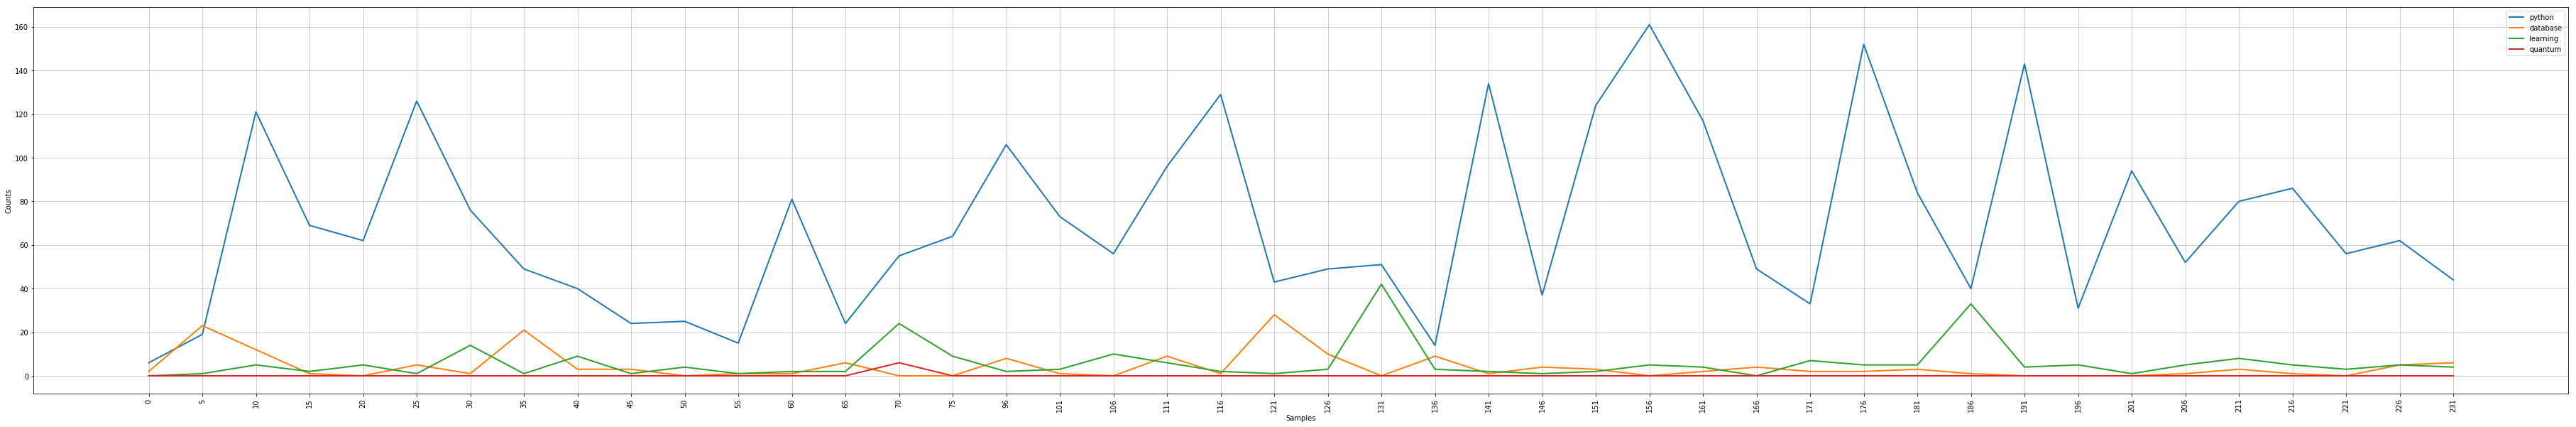

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(64,10))
cfd.plot()


We can make a few observations from the figure above. You will have to however download the figure as it's too small to see it in its notebook form. 

Quantum has only been mentioned once which makes sense since quantum computing, quantum physics, etc. aren't common topics to talk about. 

Also, more mentions of 'Machine Learning' in recent podcasts since it's now becoming a trending topic. 

In [54]:
# Text generation using conditional frequency distribution on bigrams
# Let's see how closely we can replicate Mike's style using this crude generator
# Let me know what you think !

# Selects a random successor to the word based on bigram frequency
def random_generate_model(cfdist, word, num=24):
    for i in range(num):
        print(word,end = ' ')
        word = random.choice(list(cfdist[word].keys()))

# Choose the one with maximum frequency
def max_generate_model(cfdist, word, num=24):
    for i in range(num):
        print(word,end = ' ')
        word = cfdist[word].max()
        
bigrams = nltk.bigrams(total_corpus)
cfd = nltk.ConditionalFreqDist(bigrams)

In [59]:
print('Random CFD generator: ')
random_generate_model(cfd,'Quantum')
print('\n')
print('Maximum CFD generator:')
max_generate_model(cfd,'Quantum')

Random CFD generator: 
Quantum Experience where again Python solution should perform effects. ah, me here. People, our white list, say Git tip if I'd actually winds up 

Maximum CFD generator:
Quantum Safe, Quantum Safe, Quantum Safe, Quantum Safe, Quantum Safe, Quantum Safe, Quantum Safe, Quantum Safe, Quantum Safe, Quantum Safe, Quantum Safe, Quantum Safe, 

Clearly, with Maximum CFD criterion, we get stuck in loops. But it's more likely to lead to meaningful word combinations
With random CFD criterion, we are likely to generate novel texts but the words may not correlate and assigning meanings to such generated texts is in general difficult. 

In [67]:
# Just curious what Mike has to say about the Universe - haha
max_generate_model(cfd,'universe')
print('\n')
random_generate_model(cfd,'universe')

universe and then you can do you can do you can do you can do you can do you can do you can do 

universe and compliant deployment different Linux Foundation. And Eric can virtually the recording capability, I thing and, once all Matplotlib, but running bad rows, 